<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-function-library" data-toc-modified-id="Using-the-function-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the function library</a></span><ul class="toc-item"><li><span><a href="#Graphical-representation-of-signal" data-toc-modified-id="Graphical-representation-of-signal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphical representation of signal</a></span></li><li><span><a href="#Function-comp_tonality" data-toc-modified-id="Function-comp_tonality-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Function comp_tonality</a></span></li></ul></li>

# How to compute acoustic Tonality
This tutorial explains how to use MOSQITO to calculate the frequency position of a pop-up tone using the Inspection Method described in Annex K of the ISO 1996-2 standard. In order to detect the existence of tonality, it's necessary to use other Mosqito functions, namely the "load" function and the "comp-third_spec" function. For more information, please refer to the documentation.

## Using the function library

First, we import the Mosqito functions and the signal we are going to use for the tutorial, in this case a pure tone of 1 KHz@60dB (.wav file)

In [6]:
# import Mosqito funtions
from mosqito.functions.oct3filter.comp_third_spectrum import comp_third_spec
from mosqito.functions.shared.load import load

# Define path to the .wav file
# To be replaced by your own path
path = "1KHZ60DB.WAV"

# load and obtain the signal data and its sampling frequency.
sig, fs = load(True, path, calib=1)


### Graphical representation of the signal
We represent the signal to visually detect the presence of a prominent tone (this step is not necessary for the operation of the "comp_tonality" function).

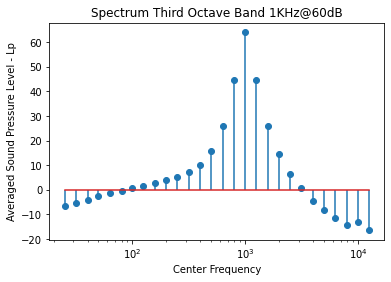

In [7]:
# Import useful packages
import matplotlib.pyplot as plt
import numpy as ny

#-- we obtain the data of the Lp in thirds of octave of the signal of which 
#-- we want to know the prominent tones
third_spec = comp_third_spec(is_stationary=True, signal=sig, fs=fs)

# -- Obtain the lists of the central frequencies and the average Lp
freqs = third_spec["freqs"]
values = third_spec["values"]
        
# Create the graph
plt.stem(freqs, values)
plt.semilogx()

## y-axis legend
plt.ylabel('Averaged Sound Pressure Level - Lp')
 
## x-axis legend
plt.xlabel('Center Frequency')
 
## Graphic Title
plt.title('Spectrum Third Octave Band 1KHz@60dB')
 
## Show Graph
plt.show()



Visually we can see that there is a prominent tone around 1 KHz with a sound pressure level of 60 dB.

### Function comp_tonality
Now let's check that using the Mosqito function "comp_tonality" we will obtain the same result.

In [9]:
# Import function for detection of prominent tones
from comp_tonality import comp_tonality

tones = comp_tonality(sig, fs)
print("----RESULT-----")
print(tones)
print("---------------")

----RESULT-----
{1000.0: 63.962211067656554}
---------------
